# Linear Regression

Linear Regression is a supervised machine learning algorithm which predicted output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- **Simple regression** - only one independent variable (e.g. sales)
- **Multiple regression** - more than one independent variables (e.g. sales, price)

There must be a `linear relationship` between X and y variables.

```
y = mx + b

Where m is the slope and b is the y-intercept and x is the input.

Error/Residual (Random error) = ypred - yoriginal

Mean Squared Error (MSE) = (Sum)^2 / total numbers of errors

```

We need to minimize the error as much as possible but not to make it zero otherwise it will go to `Overfitting`.

Machine tells us the unknown values.

![Simple Linear Regression](./images/linear_regression.png)

![Simple Linear Regression](./images/linear_regression_2.png)

![Simple Linear Regression Error](./images/linear_regression_error.png)

![Simple Linear Regression Error](./images/RMSE.png)

**Label or Target variable is Continuous or Integer -> `Regression`.**

**Label or Target variable is Categorical -> `Classification`.**

## Assumptions for Linear Regressions

Residuals = difference between original and predicted values.

1. Linearity of Residuals.
2. Independence of Residuals.
3. Normal Distribution of Residuals.

### Error Metrics

Imagine you are throwing darts at a dartboard. Each time you throw a dart, you try to hit the bullseye (the center of the board). Now, let's say you want to know how good you are at hitting the bullseye. Here’s how we can use the numbers (MSE, R², and RMSE) to understand your performance.

1. A lower `MSE` means better predictions.
   - A smaller number is better because it means your darts are landing closer to the bullseye. 
2. `R²` ranges from 0 to 1. The closer to 1, the better your model's predictions.
   - A score closer to 1 means you are doing a great job. A score closer to 0 means you need more practice. 
3. A lower `RMSE` means better predictions.
   - A smaller number is better because it means your darts are closer to the bullseye.

- `MSE` (0.965): Your darts are a bit far from the bullseye on average, but not too bad.
- `R²` (0.397): You’re hitting about 40% close to the bullseye, which means you’re okay but can get better.
- `RMSE` (0.983): Your darts are landing about 0.983 units away from the bullseye on average.

## Simple Linear Regression

Simple linear regression is an approach for predicting a `response` using a single feature. It is assumed that the two variables are `linearly related`. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

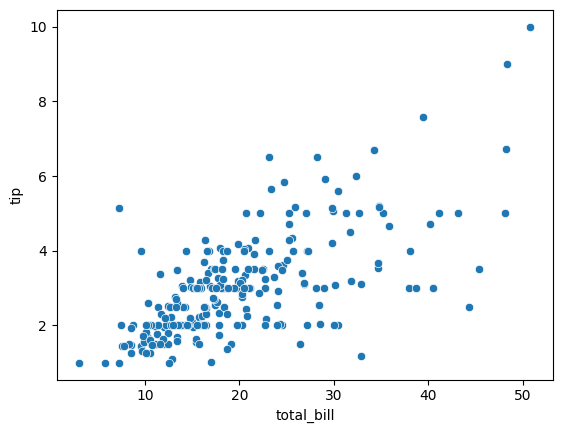

In [3]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [4]:
# split the data into X and y
X = df[['total_bill']]
# scalar = MinMaxScaler()
# X = scalar.fit_transform(X)
y = df['tip']

In [5]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# call the model
model = LinearRegression()

In [7]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# take the model intercept and slope, make an equation
# y = mx + b
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_ , '+', model.coef_, '* X')

0.7122377393557002
[0.11714055]
y =  0.7122377393557002 + [0.11714055] * X


In [12]:
# predicting values
model.predict([[20]])

c:\Users\khan\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.05504883])

In [13]:
# predict
y_pred = model.predict(X_test)

In [14]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  1.304099513289221
R2 =  0.15530674038567416
RMSE =  1.1419717655394204


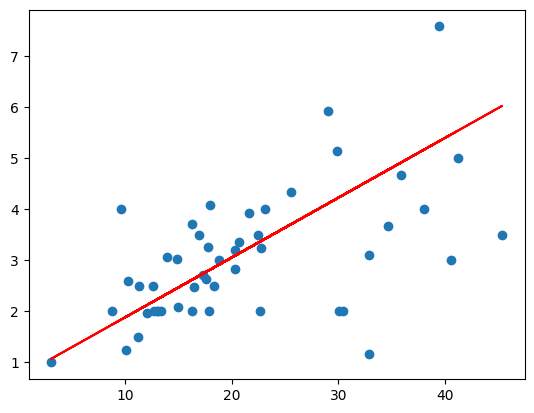

In [15]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()